# Step1 Import libraries and load the datasets

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Income_statement = pd.read_csv(r'C:\Users\HP\OneDrive\Documents\project python 2\income_statement_IBM.csv')
Balance_sheet = pd.read_csv(r'C:\Users\HP\OneDrive\Documents\project python 2\balance sheet.csv')
Cash_Flow = pd.read_csv(r'C:\Users\HP\OneDrive\Documents\project python 2\cash_flow_data.csv')

print(Income_statement.shape)
print(Balance_sheet.shape)
print(Cash_Flow.shape)

(77, 26)
(78, 38)
(15, 29)


## Step :2 Data cleaning and preperation

In [4]:
#Converting the fisical ending year to date time

Income_statement['fiscalDateEnding']= pd.to_datetime(Income_statement['fiscalDateEnding'])
Balance_sheet['fiscalDateEnding']= pd.to_datetime(Balance_sheet['fiscalDateEnding'])
Cash_Flow['fiscalDateEnding']=pd.to_datetime(Income_statement['fiscalDateEnding'])

#Exracting
Income_statement['Year']= Income_statement['fiscalDateEnding'].dt.year
Balance_sheet['Year']=Balance_sheet['fiscalDateEnding'].dt.year
Cash_Flow['Year']=Cash_Flow['fiscalDateEnding'].dt.year

#sorting
Income_statement.sort_values(by='Year',inplace=True)
Balance_sheet.sort_values(by='Year',inplace=True)
Cash_Flow.sort_values(by='Year',inplace=True)

#Reset index
Income_statement.reset_index(drop=True,inplace = True)
Balance_sheet.reset_index(drop=True,inplace=True)
Cash_Flow.reset_index(drop=True,inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_20700\1514492453.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Income_statement['fiscalDateEnding']= pd.to_datetime(Income_statement['fiscalDateEnding'])
C:\Users\HP\AppData\Local\Temp\ipykernel_20700\1514492453.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Balance_sheet['fiscalDateEnding']= pd.to_datetime(Balance_sheet['fiscalDateEnding'])


## Step:3 Merge all three statements

In [5]:
# Merging the income statement , Balance statements and Cash flow statement

Ib_merge = pd.merge(Income_statement,Balance_sheet, on='Year',suffixes=('_Income','_balance'))

IBC_merge = pd.merge(Ib_merge,Cash_Flow,on='Year',suffixes=('','_Cashflow'))

print(IBC_merge.columns)
print(IBC_merge.shape)

Index(['fiscalDateEnding_Income', 'reportedCurrency_Income', 'grossProfit',
       'totalRevenue', 'costOfRevenue', 'costofGoodsAndServicesSold',
       'operatingIncome', 'sellingGeneralAndAdministrative',
       'researchAndDevelopment', 'operatingExpenses', 'investmentIncomeNet',
       'netInterestIncome', 'interestIncome', 'interestExpense',
       'nonInterestIncome', 'otherNonOperatingIncome', 'depreciation',
       'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense',
       'interestAndDebtExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome', 'Year',
       'fiscalDateEnding_balance', 'reportedCurrency_balance', 'totalAssets',
       'totalCurrentAssets', 'cashAndCashEquivalentsAtCarryingValue',
       'cashAndShortTermInvestments', 'inventory', 'currentNetReceivables',
       'totalNonCurrentAssets', 'propertyPlantEquipment',
       'accumulatedDepreciationAmortizationPPE', 'intangibleAssets',
     

## Step:4  Calculate key financial ratios

In [6]:
# Profitability ratios 
## 1. Gross profit margin
IBC_merge['Gross_Margin']= IBC_merge['grossProfit']/IBC_merge['totalRevenue']

## 2. Operating margin
IBC_merge['Operating_Margin']= IBC_merge['operatingIncome']/IBC_merge['totalRevenue']

## 3. Net Profit Margin
IBC_merge['Net_Profit_Margin']=IBC_merge['netIncome']/IBC_merge["totalRevenue"]

# Liquidity & Leverage Ratios
## 4 Curent ratio
IBC_merge['Current_Ratio']= IBC_merge['totalCurrentAssets']/IBC_merge['totalCurrentLiabilities']

## 5 debt to equity ratio
IBC_merge['Debt_to_Equity']=IBC_merge['totalLiabilities']/IBC_merge['totalShareholderEquity']

#Return ratios
## 6  Return on Assets (ROA)
IBC_merge['ROA']=IBC_merge['netIncome']/IBC_merge['totalAssets']

## 7 Return on Equity (ROE)
IBC_merge['ROE']=IBC_merge['netIncome']/IBC_merge['totalShareholderEquity']

#Cash flow ratios
## 8 Operating cash flow margin
IBC_merge['OCF']= IBC_merge['operatingCashflow']/IBC_merge['totalRevenue']

##9 free cash flow (FCF)
IBC_merge['FCF']=IBC_merge['operatingCashflow']/IBC_merge['capitalExpenditures']

#revenue YOY GRowth(%)
IBC_merge['Revenue_Growth']= IBC_merge['totalRevenue'].pct_change()*100


IBC_merge[['Year','totalRevenue','netIncome','Gross_Margin','Net_Profit_Margin','ROE','ROA']].round(2)


,Year,totalRevenue,netIncome,Gross_Margin,Net_Profit_Margin,ROE,ROA
0,2009.0,9.575800e+10,1.342500e+10,0.46,0.14,0.59,0.12
1,2010.0,9.987000e+10,1.482400e+10,0.46,0.15,0.64,0.13
2,2011.0,1.069160e+11,1.584900e+10,0.47,0.15,0.79,0.14
3,2012.0,1.028740e+11,1.659300e+10,0.49,0.16,0.88,0.14
4,2013.0,9.836700e+10,1.647600e+10,0.49,0.17,0.72,0.13
5,2014.0,9.279300e+10,1.201600e+10,0.50,0.13,1.01,0.10
6,2015.0,8.174100e+10,1.319000e+10,0.50,0.16,0.92,0.12
7,2016.0,7.991900e+10,1.187200e+10,0.48,0.15,0.65,0.10
8,2017.0,7.913900e+10,5.753000e+09,0.47,0.07,0.33,0.05
9,2018.0,7.959100e+10,8.728000e+09,0.46,0.11,0.52,0.07


## Step 5: Data visualisation ( four key financial charts)
# Revenue vs net income over time
# Total assets vs toal liabilities
# Cashflow breakdown
# Profit margin over time

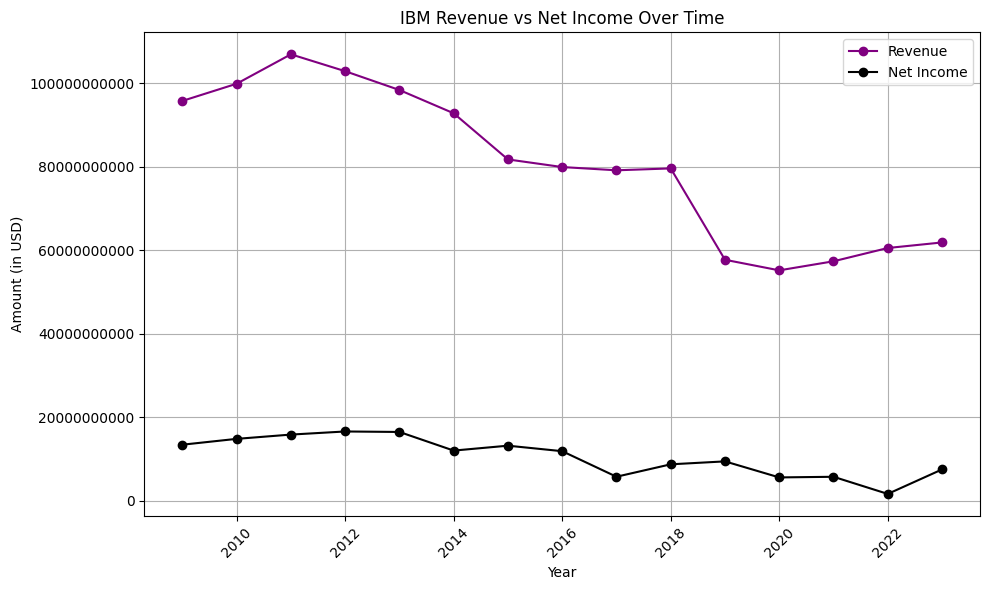

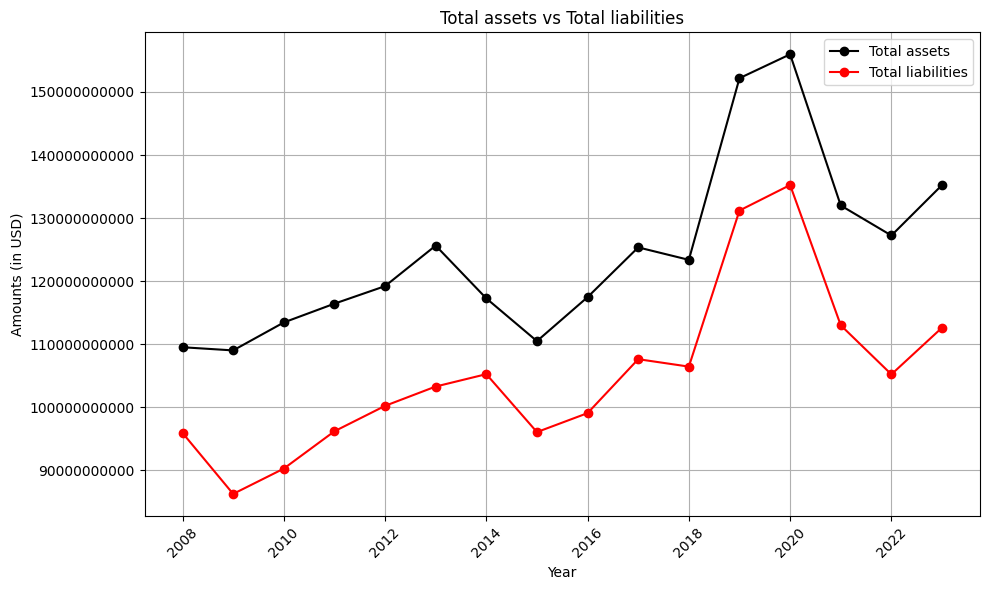

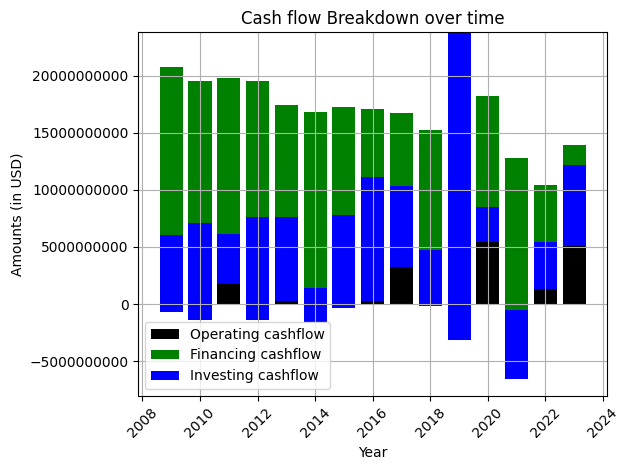

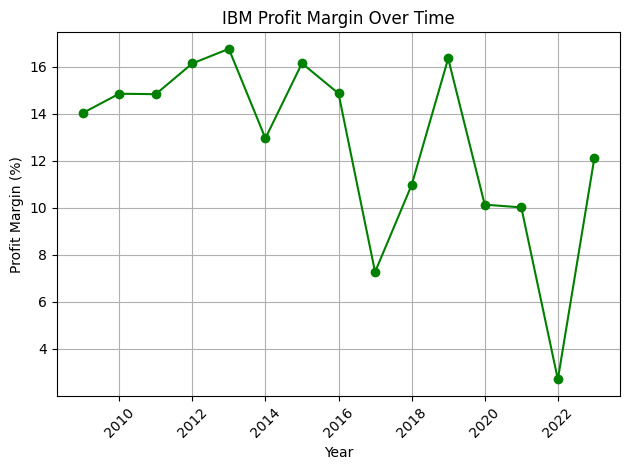

In [7]:
# Revenue vs net income over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(Income_statement['Year'], Income_statement['totalRevenue'], marker='o', color='purple', label='Revenue')
plt.plot(Income_statement['Year'], Income_statement['netIncome'], marker='o', color='black', label='Net Income')
plt.title('IBM Revenue vs Net Income Over Time')
plt.xlabel('Year')
plt.ylabel('Amount (in USD)')
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#Total assets vs total liabilities
plt.figure(figsize=(10,6))
plt.plot(Balance_sheet['Year'],Balance_sheet['totalAssets'],color='black',marker='o',label='Total assets')
plt.plot(Balance_sheet['Year'],Balance_sheet['totalLiabilities'],color='red',marker='o',label='Total liabilities')
plt.title('Total assets vs Total liabilities')
plt.xlabel('Year')
plt.ylabel('Amounts (in USD)')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.ticklabel_format(style='plain',axis='y')
plt.tight_layout()
plt.show()

# Cash flow Breakdown


plt.bar(Cash_Flow['Year'],Cash_Flow['operatingCashflow'],color='black',label='Operating cashflow')
plt.bar(Cash_Flow['Year'],Cash_Flow['cashflowFromFinancing'],bottom=Cash_Flow['operatingCashflow'] ,color='green',label='Financing cashflow')
plt.bar(Cash_Flow['Year'],Cash_Flow['cashflowFromInvestment'],bottom=Cash_Flow['operatingCashflow'] + Cash_Flow['cashflowFromFinancing'],color='blue',label='Investing cashflow')
plt.title('Cash flow Breakdown over time')
plt.xlabel('Year')
plt.ylabel('Amounts (in USD)')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain',axis='y')
plt.tight_layout()
plt.show()

# Profit margin over time
Income_statement['Profit Margin (%)'] = (Income_statement['netIncome'] / Income_statement['totalRevenue']) * 100

plt.plot(Income_statement['Year'],Income_statement['Profit Margin (%)'], marker='o', color='green')
plt.title('IBM Profit Margin Over Time')
plt.xlabel('Year')
plt.ylabel('Profit Margin (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Step 6 : Financial Insights & Interpretation

Based on 4 Visualizations

 1. Revenue vs Net Income Over Time

Insight:

 IBM's revenue shows a declining trend from 2012 to 2021. Net income also follows a downward pattern, with some sharp drops in recent years.
This indicates challenges in sales growth, and possibly rising costs or reduced efficiency, leading to reduced profitability.



 2. Total Assets vs Total Liabilities

Insight:

 IBM consistently maintained higher assets than liabilities, showing that the company is solvent and has more resources than debts.
However, the gap between assets and liabilities is not growing, which may mean stagnant asset growth or rising debt levels


 3. Cash Flow Breakdown

Insight:

 Operating cash flow is consistently positive — this shows that IBM’s core business is generating good cash.
Investing cash flow is negative (normal for tech firms doing R&D or buying assets).
Financing cash flow changes from year to year, suggesting variable dividend payments, share buybacks, or loan activities.


 4. Profit Margin Over Time

Insight:

 IBM's profit margin (%) is low and inconsistent, mostly under 15%.
This reflects tight margins and suggests that expenses are high compared to revenue, reducing overall profitability.

### Step 7: Conclusion

In this project, I performed a Financial Statement Analysis of *IBM* using Python and Matplotlib. I analyzed the company's performance over the period *2012 to 2021*, focusing on four core financial indicators:

1. *Revenue vs Net Income* revealed a consistent decline in both top-line and bottom-line figures, highlighting potential challenges in sales growth and profitability.
2. *Total Assets vs Total Liabilities* showed that IBM remains solvent, with assets exceeding liabilities, but without significant growth in asset base.
3. *Cash Flow Breakdown* confirmed strong operational cash flows, while negative investing cash flows reflected ongoing capital investments and R&D. Financing cash flow trends varied, indicating strategic financial decisions.
4. *Profit Margin Analysis* showed low and fluctuating margins, suggesting high operating costs relative to revenue.

Overall, the company appears financially stable but faces challenges in sustaining profitability and growth. This project demonstrates how Python can be effectively used for financial analysis and data-driven insights.

In [8]:
IBC_merge.to_csv('IBM financial analysis 2009_2023.csv',index=False)